In [617]:
%load_ext autoreload
%autoreload 2
import numpy as np
from Environment import Dealer, BlackjackEnv
from agent import QLearningAgent
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

dealer = Dealer()
dealer.create_playing_deck(D = np.inf)
#print last 10 cards in the deck
print(dealer.playing_deck[-10:])
print('deal five cards:')
#deal 5 cards 
for i in range(5):
    print(dealer.deal_card())
print('new upcoming cards:')
print(dealer.playing_deck[-10:]) 


[('clubs', 11), ('spades', 2), ('spades', 12), ('hearts', 3), ('spades', 11), ('clubs', 2), ('hearts', 8), ('clubs', 8), ('clubs', 1), ('hearts', 9)]
deal five cards:
('hearts', 9)
('clubs', 1)
('clubs', 8)
('hearts', 8)
('clubs', 2)
new upcoming cards:
[('spades', 5), ('clubs', 7), ('spades', 5), ('clubs', 6), ('spades', 4), ('clubs', 11), ('spades', 2), ('spades', 12), ('hearts', 3), ('spades', 11)]


In [467]:
env = BlackjackEnv(D=1)

# Watkins Q-Learning Agent 

For the case where the number of decks used to deal is infinite, We can make use of Watkins Q-Learning. This is a temporal difference method. 

The general method is as follows: 

1. An initial Q-table is created, giving hit and stick for all the hand values as equal (all have an initial Q-value of 0)
2. a hand is played, the Q-values are updated according the the update rule after each card is drawn. (Reward is only given after the hand is over is the player doesnt bust)
3. steps 1 and 2 are repeated and the Q_table is updated until the Q_values converge.
4. The learned Q-table is then the policy that the agent has learned to maximise its reward per-hand. 

Q update rule:
 $$Q'(S,A) = (1-\alpha)Q(S,A) + \alpha[R + \gamma \max_{a}Q(S',a)]$$

 In this case we can set the discount factor $\gamma$ = 1, as we are only interested in the reward after the hand has been played. $\alpha$ is the learning rate. 

The Q-values in the table represent the expected reward for a hand given a specific action and state. For example if the Q-value for hitting when the hand value is 13 is 153.2, the exepected or average reward for a hand given hitting on 13 is 153.2

Testing the Q learning agent for an infinite deck of cards 

In [628]:
#initialize agent for Q-learning
agent = QLearningAgent(env, alpha=0.1, gamma=1, epsilon=0.3)

In [629]:
agent.env.reset_deck(D=np.inf)
episode_reward = agent.run_episode_reward()
print('reward after one episode: ',episode_reward)
print('Q values: ', agent.Q_values)
average_reward = agent.learn(num_episodes=100000)
print('Average reward after 1000 episodes: ', average_reward)
print('Learned Q values: ', agent.Q_values)

reward after one episode:  25
Q values:  {(2, 'hit'): 0.0, (2, 'stick'): 0.0, (3, 'hit'): 0.0, (3, 'stick'): 0.0, (4, 'hit'): 0.0, (4, 'stick'): 0.0, (5, 'hit'): 0.0, (5, 'stick'): 2.5, (6, 'hit'): 0.0, (6, 'stick'): 0.0, (7, 'hit'): 0.0, (7, 'stick'): 0.0, (8, 'hit'): 0.0, (8, 'stick'): 0.0, (9, 'hit'): 0.0, (9, 'stick'): 0.0, (10, 'hit'): 0.0, (10, 'stick'): 0.0, (11, 'hit'): 0.0, (11, 'stick'): 0.0, (12, 'hit'): 0.0, (12, 'stick'): 0.0, (13, 'hit'): 0.0, (13, 'stick'): 0.0, (14, 'hit'): 0.0, (14, 'stick'): 0.0, (15, 'hit'): 0.0, (15, 'stick'): 0.0, (16, 'hit'): 0.0, (16, 'stick'): 0.0, (17, 'hit'): 0.0, (17, 'stick'): 0.0, (18, 'hit'): 0.0, (18, 'stick'): 0.0, (19, 'hit'): 0.0, (19, 'stick'): 0.0, (20, 'hit'): 0.0, (20, 'stick'): 0.0, (21, 'hit'): 0.0, (21, 'stick'): 0.0}
Episode 1 completed. Average reward: 121.0
Episode 2 completed. Average reward: 110.5
Episode 3 completed. Average reward: 79.0
Episode 4 completed. Average reward: 71.5
Episode 5 completed. Average reward: 77.2
Ep

Visualise learnd policy (q-values)

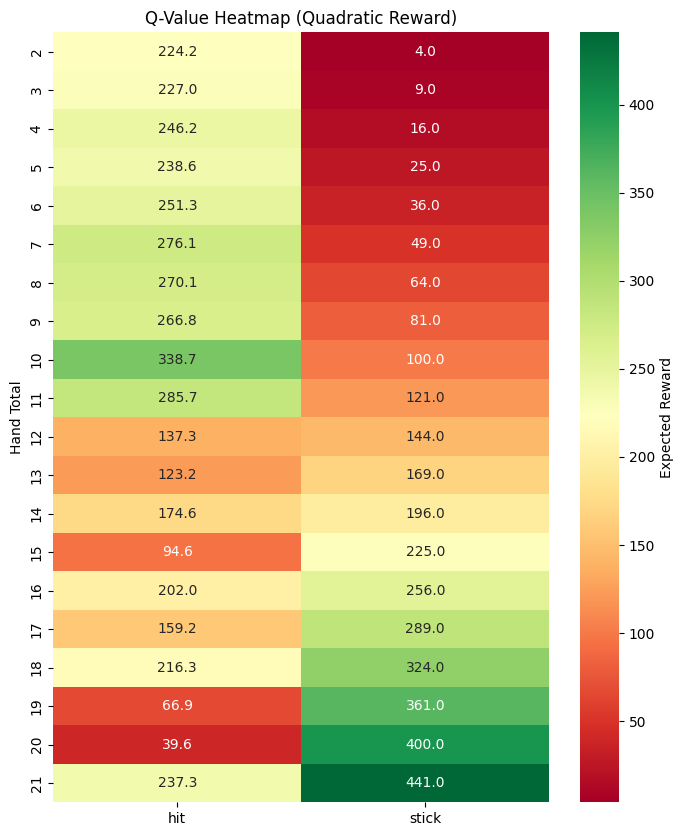

In [630]:
df = pd.Series(agent.Q_values).unstack()

df.index.name = 'Hand Total'
df = df.sort_index()

plt.figure(figsize=(8, 10))
sns.heatmap(df, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Expected Reward'})
plt.title("Q-Value Heatmap (Quadratic Reward)")
plt.show()